## Here we provide a basic algorithm for the implementation of the decomposition of KL divergence for a system having three interacting degrees of freedom. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Generating Data for the reference process (System in equilibrium at inverse temperature beta = 10 )

In [3]:
jmax = 100000 
dt = 0.01
T = 5
imax = int(T/dt)
dim_x=3

x= np.zeros((jmax,imax,dim_x))
x[:,0,:] = np.random.randn(jmax,dim_x)


theta = np.pi/4 

bet=10 
for i in range(imax-1):
    f1 = np.random.randn(jmax)
    f2 = np.random.randn(jmax)
    f3 = np.random.randn(jmax)
    a1 = 4 * x[:, i, 0]**3 * np.cos(theta)**4 - 12 * x[:, i, 0]**2 * x[:, i, 1] * np.sin(theta) * np.cos(theta)**3 + x[:, i, 0] * np.sin(theta)**2 - 2 * x[:, i, 0] * np.cos(theta)**2 + 12 * x[:, i, 0] * x[:, i, 1]**2 * np.sin(theta)**2 * np.cos(theta)**2 - 4 * x[:, i, 1]**3 * np.sin(theta)**3 * np.cos(theta) + 3 * x[:, i, 1] * np.sin(theta) * np.cos(theta)

    a2 = -4 * x[:, i, 0]**3 * np.sin(theta) * np.cos(theta)**3 + 12 * x[:, i, 0]**2 * x[:, i, 1] * np.sin(theta)**2 * np.cos(theta)**2 + 3 * x[:, i, 0] * np.sin(theta) * np.cos(theta) - 12 * x[:, i, 0] * x[:, i, 1]**2 * np.sin(theta)**3 * np.cos(theta) + 4 * x[:, i, 1]**3 * np.sin(theta)**4 - 2 * x[:, i, 1] * np.sin(theta)**2 + x[:, i, 1] * np.cos(theta)**2

    a3 = x[:, i, 2]
    x[:,i+1,0] = x[:,i,0] + (-dt*a1 +  f1* np.sqrt(2*dt/bet)) 
    x[:,i+1,1] = x[:,i,1] + (-dt*a2 +  f2* np.sqrt(2*dt/bet)) 
    x[:,i+1,2] = x[:,i,2] + (-dt*a3 +  f3* np.sqrt(2*dt/bet))

x_init = x[:,-1,:].copy()
T = 5
imax = int(T/dt)
dim_x=3

x= np.zeros((jmax,imax,dim_x))
x[:,0,:] = x_init
bet = 10 
alp = 0 #The parameter alpha is set to zero

for i in range(imax-1):

    f1 = np.random.randn(jmax)
    f2 = np.random.randn(jmax)
    f3 = np.random.randn(jmax)
    a1 = 4 * x[:, i, 0]**3 * np.cos(theta)**4 - 12 * x[:, i, 0]**2 * x[:, i, 1] * np.sin(theta) * np.cos(theta)**3 + x[:, i, 0] * np.sin(theta)**2 - 2 * x[:, i, 0] * np.cos(theta)**2 + 12 * x[:, i, 0] * x[:, i, 1]**2 * np.sin(theta)**2 * np.cos(theta)**2 - 4 * x[:, i, 1]**3 * np.sin(theta)**3 * np.cos(theta) + 3 * x[:, i, 1] * np.sin(theta) * np.cos(theta)

    a2 = -4 * x[:, i, 0]**3 * np.sin(theta) * np.cos(theta)**3 + 12 * x[:, i, 0]**2 * x[:, i, 1] * np.sin(theta)**2 * np.cos(theta)**2 + 3 * x[:, i, 0] * np.sin(theta) * np.cos(theta) - 12 * x[:, i, 0] * x[:, i, 1]**2 * np.sin(theta)**3 * np.cos(theta) + 4 * x[:, i, 1]**3 * np.sin(theta)**4 - 2 * x[:, i, 1] * np.sin(theta)**2 + x[:, i, 1] * np.cos(theta)**2

    a3 = x[:, i, 2]
    x[:,i+1,0] = x[:,i,0] + (- dt*a1 + alp*dt*a3 +  f1* np.sqrt(2*dt/bet)) 
    x[:,i+1,1] = x[:,i,1] + (- dt*a2 + f2* np.sqrt(2*dt/bet))
    x[:,i+1,2] = x[:,i,2] + (- dt*a3 - alp*dt*a1 +  f3* np.sqrt(2*dt/bet)) 

data_ref = x[:,-1,:].copy()


## Generating data corresponding to thermal relaxation from beta = 1 to beta = 10

In [5]:

jmax = 100000 
dt = 0.01
T = 5
imax = int(T/dt)
dim_x=3

x= np.zeros((jmax,imax,dim_x))
x[:,0,:] = np.random.randn(jmax,dim_x)


theta = np.pi/4 

bet=1 #ws10
for i in range(imax-1):
    f1 = np.random.randn(jmax)
    f2 = np.random.randn(jmax)
    f3 = np.random.randn(jmax)
    a1 = 4 * x[:, i, 0]**3 * np.cos(theta)**4 - 12 * x[:, i, 0]**2 * x[:, i, 1] * np.sin(theta) * np.cos(theta)**3 + x[:, i, 0] * np.sin(theta)**2 - 2 * x[:, i, 0] * np.cos(theta)**2 + 12 * x[:, i, 0] * x[:, i, 1]**2 * np.sin(theta)**2 * np.cos(theta)**2 - 4 * x[:, i, 1]**3 * np.sin(theta)**3 * np.cos(theta) + 3 * x[:, i, 1] * np.sin(theta) * np.cos(theta)

    a2 = -4 * x[:, i, 0]**3 * np.sin(theta) * np.cos(theta)**3 + 12 * x[:, i, 0]**2 * x[:, i, 1] * np.sin(theta)**2 * np.cos(theta)**2 + 3 * x[:, i, 0] * np.sin(theta) * np.cos(theta) - 12 * x[:, i, 0] * x[:, i, 1]**2 * np.sin(theta)**3 * np.cos(theta) + 4 * x[:, i, 1]**3 * np.sin(theta)**4 - 2 * x[:, i, 1] * np.sin(theta)**2 + x[:, i, 1] * np.cos(theta)**2

    a3 = x[:, i, 2]
    x[:,i+1,0] = x[:,i,0] + (-dt*a1 +  f1* np.sqrt(2*dt/bet)) 
    x[:,i+1,1] = x[:,i,1] + (-dt*a2 +  f2* np.sqrt(2*dt/bet)) 
    x[:,i+1,2] = x[:,i,2] + (-dt*a3 +  f3* np.sqrt(2*dt/bet))
x_init = x[:,-1,:].copy()
T = 5
imax = int(T/dt)
dim_x=3

x= np.zeros((jmax,imax,dim_x))
x[:,0,:] = x_init
bet = 10 
alp = 10 

for i in range(imax-1):
    f1 = np.random.randn(jmax)
    f2 = np.random.randn(jmax)
    f3 = np.random.randn(jmax)
    a1 = 4 * x[:, i, 0]**3 * np.cos(theta)**4 - 12 * x[:, i, 0]**2 * x[:, i, 1] * np.sin(theta) * np.cos(theta)**3 + x[:, i, 0] * np.sin(theta)**2 - 2 * x[:, i, 0] * np.cos(theta)**2 + 12 * x[:, i, 0] * x[:, i, 1]**2 * np.sin(theta)**2 * np.cos(theta)**2 - 4 * x[:, i, 1]**3 * np.sin(theta)**3 * np.cos(theta) + 3 * x[:, i, 1] * np.sin(theta) * np.cos(theta)

    a2 = -4 * x[:, i, 0]**3 * np.sin(theta) * np.cos(theta)**3 + 12 * x[:, i, 0]**2 * x[:, i, 1] * np.sin(theta)**2 * np.cos(theta)**2 + 3 * x[:, i, 0] * np.sin(theta) * np.cos(theta) - 12 * x[:, i, 0] * x[:, i, 1]**2 * np.sin(theta)**3 * np.cos(theta) + 4 * x[:, i, 1]**3 * np.sin(theta)**4 - 2 * x[:, i, 1] * np.sin(theta)**2 + x[:, i, 1] * np.cos(theta)**2

    a3 = x[:, i, 2]
    x[:,i+1,0] = x[:,i,0] + (- dt*a1 + alp*dt*a3 +  f1* np.sqrt(2*dt/bet)) 
    x[:,i+1,1] = x[:,i,1] + (- dt*a2 + f2* np.sqrt(2*dt/bet)) 
    x[:,i+1,2] = x[:,i,2] + (- dt*a3 - alp*dt*a1 +  f3* np.sqrt(2*dt/bet))


## Verifying that the different variables have pairwise and higher order correlations

(0.0, 2.0)

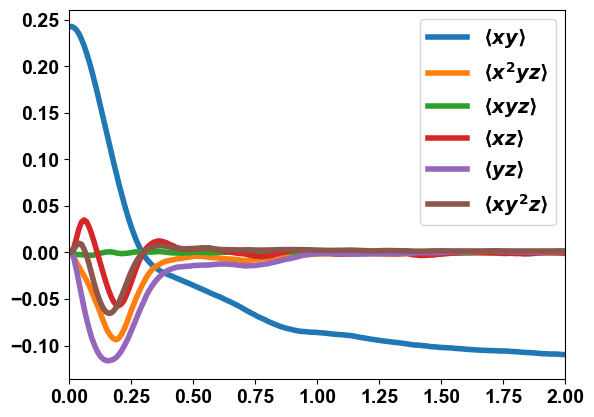

In [6]:
tim = np.arange(0,imax) * dt

#set font size 14 and arial family bold
plt.rc('font', size=14)
plt.rc('font', family='Arial', weight='bold')
#set linewidth 4
plt.rc('lines', linewidth=4)

cov12x =[]
for i in range(imax):
    #cov12x.append(np.cov(x[:,i,:].T)[0,1])
    cov12x.append(np.mean(x[:,i,0]*x[:,i,1]) )
cov12x = np.array(cov12x)
plt.plot(tim,cov12x,label = r'$\langle xy \rangle$')

cov12x =[]
for i in range(imax):
    #cov12x.append(np.cov(x[:,i,:].T)[0,1])
    cov12x.append(np.mean(x[:,i,0]**2*x[:,i,1]*x[:,i,2]) )
cov12x = np.array(cov12x)
plt.plot(tim,cov12x,label = r'$\langle x^2 yz \rangle$')

cov12x =[]
for i in range(imax):
    #cov12x.append(np.cov(x[:,i,:].T)[0,1])
    cov12x.append(np.mean(x[:,i,0]*x[:,i,1]*x[:,i,2]) )
cov12x = np.array(cov12x)
plt.plot(tim,cov12x,label = r'$\langle xyz \rangle$')

cov12x =[]
for i in range(imax):
    #cov12x.append(np.cov(x[:,i,:].T)[0,1])
    cov12x.append(np.mean(x[:,i,0]*x[:,i,2]) )
cov12x = np.array(cov12x)
plt.plot(tim,cov12x,label = r'$\langle xz \rangle$')

cov12x =[]
for i in range(imax):
    #cov12x.append(np.cov(x[:,i,:].T)[0,1])
    cov12x.append(np.mean(x[:,i,1]*x[:,i,2]) )
cov12x = np.array(cov12x)
plt.plot(tim,cov12x,label = r'$\langle yz \rangle$')

cov12x =[]
for i in range(imax):
    #cov12x.append(np.cov(x[:,i,:].T)[0,1])
    cov12x.append(np.mean(x[:,i,0]*x[:,i,1]**2*x[:,i,2]) )
cov12x = np.array(cov12x)
plt.plot(tim,cov12x,label = r'$\langle xy^2z \rangle$')

plt.legend()

plt.xlim([0,2])



## Code to compute the total KL divergence D

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def compute_histogram(data, dim=3, num_bins=10, bounds=(-1, 1)):
    if dim < 1:
        raise ValueError("Dimension must be at least 1.")

    # Check if data is 1D
    if dim == 1:
        hist, edges = np.histogram(data, bins=num_bins, range=bounds)
        hist = hist / np.sum(hist)
    else:
        # Create a list of bin edges for each axis
        bins = [np.linspace(bounds[0], bounds[1], num_bins + 1) for _ in range(dim)]

        # Compute the N-dimensional histogram
        hist, edges = np.histogramdd(data, bins=bins)
        hist = hist / np.sum(hist)

    return hist, edges

In [8]:
dq = data_ref.copy()

In [9]:
histf, edgesf = compute_histogram(dq, dim=3, num_bins=20, bounds=(-2, 2))

In [10]:
histi=[]
kl = []
for i in range(0,imax, 10):
    print(i)
    histi.append(compute_histogram(x[:,i,:], dim=3, num_bins=20, bounds=(-2, 2))[0])
    kl_term = -histi[-1] * np.log(1e-10 + (histf /( histi[-1]+1e-10)))
    kl_term = np.clip(kl_term,a_min=0, a_max=None)
    kl.append(np.sum(kl_term))
kl = np.array(kl)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


Text(0, 0.5, 'KL divergence')

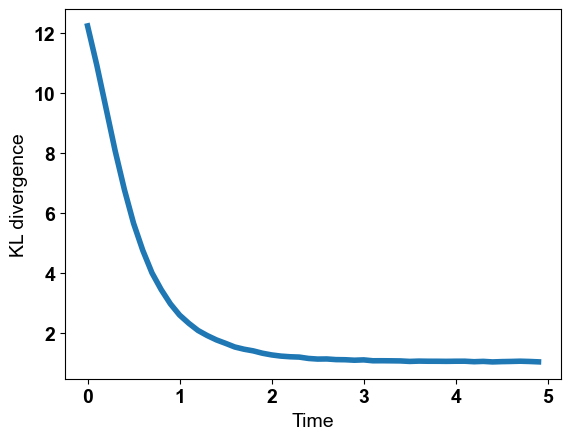

In [11]:
time = np.arange(0,imax,10) * dt
plt.plot(time,kl)
plt.xlabel('Time')
plt.ylabel('KL divergence')


## Code to compute the independent distance $D^{(1)}$

In [12]:
histf1, edgesf1 = compute_histogram(dq[:,0], dim=1, num_bins=20, bounds=(-2, 2))
histf2, edgesf2 = compute_histogram(dq[:,1], dim=1, num_bins=20, bounds=(-2, 2))
histf3, edgesf3 = compute_histogram(dq[:,2], dim=1, num_bins=20, bounds=(-2, 2))

In [13]:
histi=[]
kl1 = []
for i in range(0,imax, 10):
    print(i)
    histi.append(compute_histogram(x[:,i,0], dim=1, num_bins=20, bounds=(-2, 2))[0])
    kl_term = -histi[-1] * np.log(1e-10 + (histf1 /( histi[-1]+1e-10)))
    kl_term = np.clip(kl_term,a_min=0, a_max=None)
    kl1.append(np.sum(kl_term))
kl1 = np.array(kl1)

histi=[]
kl2 = []
for i in range(0,imax, 10):
    print(i)
    histi.append(compute_histogram(x[:,i,1], dim=1, num_bins=20, bounds=(-2, 2))[0])
    kl_term = -histi[-1] * np.log(1e-10 + (histf2 /( histi[-1]+1e-10)))
    kl_term = np.clip(kl_term,a_min=0, a_max=None)
    kl2.append(np.sum(kl_term))
kl2 = np.array(kl2)

histi=[]
kl3 = []
for i in range(0,imax, 10):
    print(i)
    histi.append(compute_histogram(x[:,i,2], dim=1, num_bins=20, bounds=(-2, 2))[0])
    kl_term = -histi[-1] * np.log(1e-10 + (histf3 /( histi[-1]+1e-10)))
    kl_term = np.clip(kl_term,a_min=0, a_max=None)
    kl3.append(np.sum(kl_term))
kl3 = np.array(kl3)

klind = kl1+kl2+kl3


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


Text(0, 0.5, 'KL divergence')

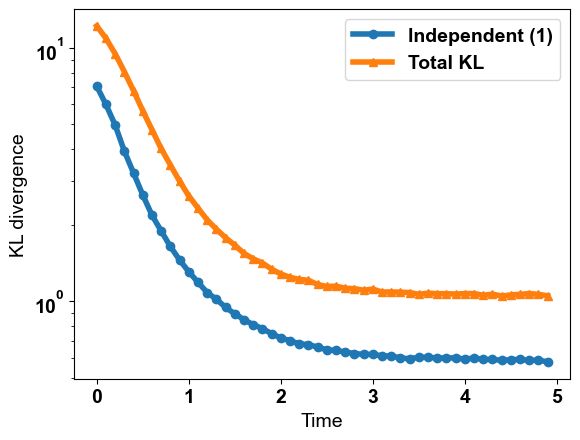

In [14]:
plt.plot(time,klind,'-o',label = 'Independent (1)')
plt.plot(time, kl,'-^',label = 'Total KL')
plt.yscale('log')
plt.legend()
plt.xlabel('Time')  
plt.ylabel('KL divergence')

## Compute 2nd order KL Divergence $D^{(2)}$

In [15]:
histf12, edgesf12 = compute_histogram(dq[:,[0,1]], dim=2, num_bins=20, bounds=(-2, 2))
histf23, edgesf23 = compute_histogram(dq[:,[1,2]], dim=2, num_bins=20, bounds=(-2, 2))
histf13, edgesf13 = compute_histogram(dq[:,[0,2]], dim=2, num_bins=20, bounds=(-2, 2))

In [16]:
histi=[]
kl12 = []
for i in range(0,imax, 10):
    print(i)
    histi.append(compute_histogram(x[:,i,[0,1]], dim=2, num_bins=20, bounds=(-2, 2))[0])
    kl_term = -histi[-1] * np.log(1e-10 + (histf12 /( histi[-1]+1e-10)))
    kl_term = np.clip(kl_term,a_min=0, a_max=None)
    kl12.append(np.sum(kl_term))
kl12 = np.array(kl12)

histi=[]
kl23 = []
for i in range(0,imax, 10):
    print(i)
    histi.append(compute_histogram(x[:,i,[1,2]], dim=2, num_bins=20, bounds=(-2, 2))[0])
    kl_term = -histi[-1] * np.log(1e-10 + (histf23 /( histi[-1]+1e-10)))
    kl_term = np.clip(kl_term,a_min=0, a_max=None)
    kl23.append(np.sum(kl_term))
kl23 = np.array(kl23)

histi=[]
kl13 = []
for i in range(0,imax, 10):
    print(i)
    histi.append(compute_histogram(x[:,i,[0,2]], dim=2, num_bins=20, bounds=(-2, 2))[0])
    kl_term = -histi[-1] * np.log(1e-10 + (histf13 /( histi[-1]+1e-10)))
    kl_term = np.clip(kl_term,a_min=0, a_max=None)
    kl13.append(np.sum(kl_term))
kl13 = np.array(kl13)

klind2 = kl12+kl23+kl13 - kl1-kl2-kl3



0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


In [17]:
kl12int = kl12-kl1-kl2.copy()
kl23int = kl23-kl2-kl3.copy()
kl13int = kl13-kl1-kl3.copy()

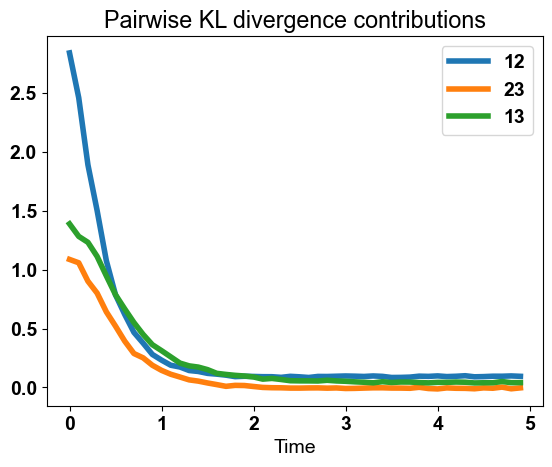

In [22]:
tim = np.arange(0,imax, 10) * dt
plt.plot(tim,kl12int, label = '12')
plt.plot(tim,kl23int, label = '23')
plt.plot(tim,kl13int, label = '13')
plt.xlabel('Time')
plt.title('Pairwise KL divergence contributions')
plt.legend()

Text(0.5, 0, 'Time')

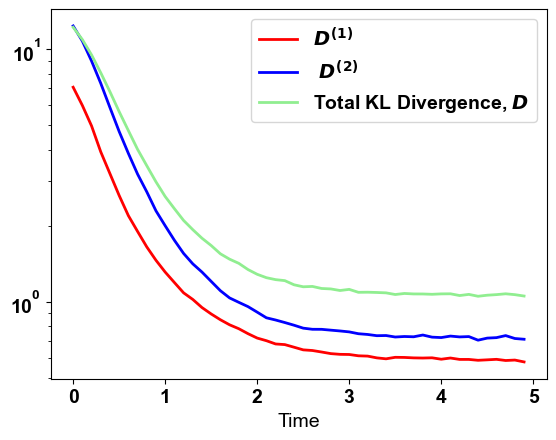

In [31]:
plt.rc('font', size=14)
plt.rc('font', family='Arial', weight='bold')

tim = np.arange(0,imax, 10) * dt
plt.plot(tim,klind,color = 'red', lw = 2,alpha = 1, label = '$D^{(1)}$' )
plt.plot(tim,klind2,color = 'blue', lw = 2,alpha = 1, label = ' $D^{(2)}$' )
plt.plot(tim,kl,color = 'lightgreen', lw = 2, alpha = 1, label = 'Total KL Divergence, $D$' )
plt.yscale('log')
plt.legend()
plt.xlabel('Time')


Text(0.5, 0, 'Time')

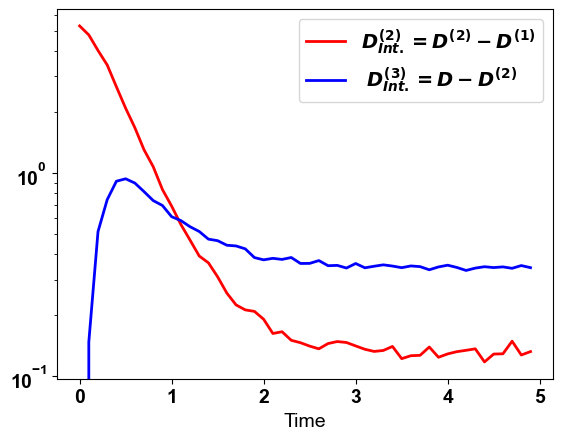

In [30]:
plt.rc('font', size=14)
plt.rc('font', family='Arial', weight='bold')

tim = np.arange(0,imax, 10) * dt
plt.plot(tim,klind2 -klind,color = 'red', lw = 2,alpha = 1, label = '$D^{(2)}_{Int.} = D^{(2)} - D^{(1)}$' )
plt.plot(tim,kl -klind2,color = 'blue', lw = 2,alpha = 1, label = ' $D^{(3)}_{Int.} = D - D^{(2)}$' )
plt.yscale('log')
plt.legend()
plt.xlabel('Time')